In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import altair as alt
import streamlit as st
from vega_datasets import data
import icd10

In [3]:
# Open compressed country data
with zipfile.ZipFile("df_country.zip") as myzip:    
    country_df = myzip.open("df_country.csv") # Dataset containing country data (each row is a trial-country pair)
    
# Read country data
df = pd.read_csv(eval('country_df'))

# Loading country code data, to be used for mapping to world map
country_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/country_codes.csv', dtype = {'country-code': str})
country_df = country_df[['Country', 'country-code']]
country_df = country_df.replace('United States of America', 'United States')

# Merge country code to main df
df = pd.merge(df, country_df,  how='left', left_on='country', right_on='Country')
df["year"] = pd.DatetimeIndex(df["study_date"]).year.astype("float")


In [6]:
len(df)

46456

In [5]:
len(df["year"].isna())

46456

In [45]:
! pip install icd10-cm

     |████████████████████████████████| 675 kB 1.9 MB/s eta 0:00:01


In [8]:
with zipfile.ZipFile("merged_datasets.zip") as myzip:
    no1 = myzip.open("merged_datasets/phase_I_test.csv")
    no2 = myzip.open("merged_datasets/phase_I_valid.csv")
    no3 = myzip.open("merged_datasets/phase_I_train.csv")
    no4 = myzip.open("merged_datasets/phase_II_valid.csv")
    no5 = myzip.open("merged_datasets/phase_II_test.csv")
    no6 = myzip.open("merged_datasets/phase_II_train.csv")
    no7 = myzip.open("merged_datasets/phase_III_valid.csv")
    no8 = myzip.open("merged_datasets/phase_III_test.csv")
    no9 = myzip.open("merged_datasets/phase_III_train.csv")
    
#Now, we can read in the data
df = pd.read_csv(eval('no1'))

for i in range(2,10): 
    df_temp = pd.read_csv(eval('no'+ str(i)))
    df = df.append(df_temp, ignore_index=True)

df.head()

/var/folders/gn/1dwlg7ns6s3d_22hhl8kmrwm0000gn/T/ipykernel_8320/2957319813.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
/var/folders/gn/1dwlg7ns6s3d_22hhl8kmrwm0000gn/T/ipykernel_8320/2957319813.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
/var/folders/gn/1dwlg7ns6s3d_22hhl8kmrwm0000gn/T/ipykernel_8320/2957319813.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
/var/folders/gn/1dwlg7ns6s3d_22hhl8kmrwm0000gn/T/ipykernel_8320/2957319813.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,criteria,study_date,country,participant_count,outcome
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Belgium,NaN,1
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Czechia,NaN,1
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Denmark,NaN,1
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,France,NaN,1
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Germany,NaN,1


In [9]:
df_merged_grouped3 = df.groupby(['outcome','phase']).agg(trials_count=('nct_id', np.size)).reset_index()
df_merged_grouped3.head()

,outcome,phase,trials_count
0,0,early phase 1,45
1,0,phase 1,2365
2,0,phase 1/phase 2,13986
3,0,phase 2,116359
4,0,phase 2/phase 3,11612


In [10]:
chart2 = alt.Chart(df_merged_grouped3).mark_bar().encode(
    x='outcome:N',
    y='trials_count:Q',
    color='outcome:N',
    column='phase'
)
chart2

alt.Chart(...)

In [11]:
country_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/country_codes.csv', dtype = {'conuntry-code': str})
country_df = country_df[['Country', 'country-code']]
country_df = country_df.replace('United States of America', 'United States')

country_code_df = pd.merge(df, country_df,  how='left', left_on='country', right_on='Country')
country_code_df.head()

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,criteria,study_date,country,participant_count,outcome,Country,country-code
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Belgium,NaN,1,Belgium,56.0
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Czechia,NaN,1,Czechia,203.0
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Denmark,NaN,1,Denmark,208.0
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,France,NaN,1,France,250.0
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Germany,NaN,1,Germany,276.0


In [12]:
df_country_new = country_code_df.groupby(['country','country-code']).agg(trials_count=('nct_id', np.size)).reset_index()

In [13]:
source = alt.topo_feature(data.world_110m.url, 'countries')

width = 900
height  = 500
project = 'equirectangular'


background = alt.Chart(source
).mark_geoshape(
    fill='#aaa',
    stroke='white'
).properties(
    width=width,
    height=height
).project(project)


base = alt.Chart(source
    ).properties( 
        width=width,
        height=height
    ).project(project
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(df_country_new, "country-code", fields =['trials_count', 'country']),
    )



# fix the color schema so that it will not change upon user selection
rate_scale = alt.Scale(domain=[df_country_new['trials_count'].min(), df_country_new['trials_count'].max()])
rate_color = alt.Color(field="trials_count", type="quantitative", scale=rate_scale)
chart_rate = base.mark_geoshape().encode(
    ######################
    # P3.1 map visualization showing the mortality rate
    # add your code here
    ######################
    # P3.3 tooltip
    # add your code here
    color='trials_count:Q',
    tooltip=['trials_count:Q', 'country:N']

    )
background + chart_rate

alt.LayerChart(...)

In [14]:
country_code_df["year"] = pd.DatetimeIndex(country_code_df["study_date"]).year.astype("float")
df = country_code_df
df.head()

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,criteria,study_date,country,participant_count,outcome,Country,country-code,year
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Belgium,NaN,1,Belgium,56.0,2011.0
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Czechia,NaN,1,Czechia,203.0,2011.0
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Denmark,NaN,1,Denmark,208.0,2011.0
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,France,NaN,1,France,250.0,2011.0
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,\n Inclusion Criteria:\n\n - ...,2011-01-28,Germany,NaN,1,Germany,276.0,2011.0


In [58]:
subset = df[df['year'].notna()]
subset = subset[subset["year"] <= 2012]

countries = ["Austria","Germany","Iceland","Spain","Sweden","Thailand","Turkey"]
subset = subset[subset["country"].isin(countries)]

In [59]:
df2 = subset.groupby(['country','country-code','year']).agg(trials_count=('nct_id', np.size)).reset_index()
df2.head()

,country,country-code,year,trials_count
0,Austria,40.0,1999.0,4
1,Austria,40.0,2000.0,1
2,Austria,40.0,2001.0,1
3,Austria,40.0,2002.0,5
4,Austria,40.0,2003.0,73


In [60]:
chart4 = alt.Chart(df2).mark_line().encode(
    x=alt.X("year:O"),
    y=alt.Y("trials_count"),
    color="country"
)
chart4

alt.Chart(...)

In [71]:
df3 = subset.groupby(['outcome','phase']).agg(trials_count=('nct_id', np.size)).reset_index()
df3

,outcome,phase,trials_count
0,0,phase 1,107
1,0,phase 1/phase 2,1272
2,0,phase 2,9064
3,0,phase 2/phase 3,836
4,0,phase 3,15640
5,1,phase 1,1125
6,1,phase 1/phase 2,758
7,1,phase 2,24693
8,1,phase 2/phase 3,1732
9,1,phase 3,53805


In [94]:
select_phase = alt.selection_single(fields=[alt.FieldName("phase")])

chart5_left = alt.Chart(df3).mark_arc().encode(
    theta="sum(trials_count)",
    color="phase",
    opacity=alt.condition(select_phase, alt.value(1), alt.value(0.5)),
).add_selection(select_phase)

chart5_right = alt.Chart(df3).mark_arc().encode(
    theta="trials_count",
    color="outcome:O",
    tooltip=["trials_count","phase"]
).transform_filter(select_phase)

chart5 = alt.hconcat(chart5_left, chart5_right
).resolve_scale(
    color="independent",
    theta="independent"
)
chart5

alt.HConcatChart(...)

In [39]:
with zipfile.ZipFile("smaller.zip") as myzip:    
    no1 = myzip.open("smaller.csv")

#Now, we can read in the data
df = pd.read_csv(eval('no1'), index_col=0)

In [40]:
df

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[""ewing's sarcoma/soft tissue sarcoma"", 'neuro...","[""['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,phase_III_train.csv,NCT01364649,completed,phase 3,['treatment outcome'],"[""['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1
1352648,phase_III_train.csv,NCT01364649,completed,phase 3,['treatment outcome'],"[""['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1
1352649,phase_III_train.csv,NCT01364649,completed,phase 3,['treatment outcome'],"[""['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1
1352650,phase_III_train.csv,NCT01364649,completed,phase 3,['treatment outcome'],"[""['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1


In [41]:
def col_to_list(column):
  """
  String to list of strings for an entire column
  Can be applied to "drugs", "diseases" and "icdcodes"
  """

  def remove_artefacts(entry):

    return "".join([c for c in entry if c not in ["[", "]", "'", "\""]])
  
  column = [remove_artefacts(e) for e in column]
  column = [e.split(", ") for e in column]

  return column


def remove_abbreviations(l):

  return [it.split(sep=" (")[0] for it in l]

In [42]:
# reformat train, validation and test data, does not work in a for loop
df["drugs"] = col_to_list(df["drugs"])
df["diseases"] = col_to_list(df["diseases"])
df["diseases"] = [remove_abbreviations(l) for l in df["diseases"]]
df["icdcodes"] = col_to_list(df["icdcodes"])

In [43]:
df

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1
1352648,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1
1352649,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1
1352650,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1


In [47]:
def get_desc(x): 
  code = icd10.find(x)
  #print(code)
  desc = ''
  if (code == None):
    desc= 'Other' 
  else: 
    desc =  code.description
  return desc



def get_chapter(x): 
  code = icd10.find(x)
  #print(code)
  desc = 'Other'

  try: 
    desc =  code.chapter
  except Exception: 
    pass 
  return desc



def get_block(x): 
  code = icd10.find(x)
  desc = 'Other'
  try: 
    desc =  code.block
  except Exception: 
    pass 

  return desc


def get_block_desc(x): 
  code = icd10.find(x)
  #print(code)
  desc = 'Other'
  try: 
    desc =  code.block_description
  except Exception: 
    pass 
  return desc

In [48]:
df['icdcodes_first'] = df['icdcodes'].apply(lambda x: x[0])

In [49]:
df

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12
1352648,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12
1352649,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12
1352650,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12


In [50]:
df['description'] = df['icdcodes_first'].apply(get_desc)
df['chapter'] = df['icdcodes_first'].apply(get_chapter)
df['block'] = df['icdcodes_first'].apply(get_block)
df['block_desc'] = df['icdcodes_first'].apply(get_block_desc)

In [51]:
df

,file,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,None,None,None
1,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,None,None,None
2,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,None,None,None
3,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,None,None,None
4,phase_I_test.csv,NCT01288573,completed,phase 1/phase 2,"[ewings sarcoma/soft tissue sarcoma, neuroblas...","[C71.7, C71.9, C79.31, D33.0, D33.1, D33.2, D4...","[plerixafor, plerixafor, plerixafor]",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,phase_III_train.csv,NCT01364649,completed,phase 3,[treatment outcome],"[Z01.12, Z92.89, Z75.2, M27.59, Z53.9, Z91.19,...","[vortioxetine, escitalopram, placebo]","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [52]:
code = icd10.find("C71.7")
print(code.description)         # Acute bronchitis due to Mycoplasma pneumoniae
if code.billable:
    print(code, "is billable")  # J20.0 is billable

print(code.chapter)             # X
print(code.block)               # J00-J99
print(code.block_description)   # Diseases of the respiratory system


Malignant neoplasm of brain stem
C71.7 is billable
None
None
None


In [53]:
df.columns

Index(['file', 'nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs',
       'smiless', 'study_date', 'country', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc'],
      dtype='object')

In [54]:
df = df[['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs',
       'smiless', 'study_date', 'country', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc']]

In [82]:
df[100:110]

,Unnamed: 0,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc,Country,country-code,year
100,100,NCT01657760,completed,phase 1,['alcohol dependence'],"['F10.20', 'F10.24', 'F10.27', 'F10.280', 'F10...",['citalopram'],['CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1'],2012-07-23,United States,10.0,1,F10.20,"Alcohol dependence, uncomplicated",V,F00-F99,Mental and behavioural disorders,United States,840,2012.0
101,101,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,19.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
102,102,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,10.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
103,103,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,9.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
104,104,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,9.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
105,105,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,19.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
106,106,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,19.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
107,107,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,10.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
108,108,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,9.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0
109,109,NCT01746784,completed,phase 1,['cystic fibrosis'],"['E84.9', 'Z14.1', 'E84.0', 'E84.11', 'E84.8',...","['n6022', 'normal saline']",['CC1=CC(=CC=C1N1C(CCC(O)=O)=CC=C1C1=CC=C(C=C1...,2012-12-06,United States,9.0,1,E84.9,"Cystic fibrosis, unspecified",IV,E00-E90,"Endocrine, nutritional and metabolic diseases",United States,840,2012.0


In [57]:
df.to_csv('full_df.csv')

In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import altair as alt
import streamlit as st
from vega_datasets import data

In [3]:
with zipfile.ZipFile("full_df.zip") as myzip:    
    no1 = myzip.open("full_df.csv")
    

#Now, we can read in the data
df = pd.read_csv(eval('no1'))

In [4]:


#Now, we can read in the data
df = pd.read_csv(eval('no1'))

df_merged_grouped = df.groupby(['phase','status']).agg(trials_count=('nct_id', np.size)).reset_index()

df_merged_grouped3 = df.groupby(['outcome','phase']).agg(trials_count=('nct_id', np.size)).reset_index()

country_df = pd.read_csv('https://raw.githubusercontent.com/hms-dbmi/bmi706-2022/main/cancer_data/country_codes.csv', dtype = {'country-code': str})
country_df = country_df[['Country', 'country-code']]
country_df = country_df.replace('United States of America', 'United States')

country_code_df = pd.merge(df, country_df,  how='left', left_on='country', right_on='Country')
country_code_df["year"] = pd.DatetimeIndex(country_code_df["study_date"]).year.astype("float")
df = country_code_df

df_country_new = country_code_df.groupby(['country','country-code']).agg(trials_count=('nct_id', np.size)).reset_index()
###
SFbyCountry = country_code_df.groupby(['country','country-code','outcome']).agg(trials_count=('nct_id', np.size)).reset_index()

countries = ["Austria","Germany","Iceland","Spain","Sweden","Thailand","Turkey"]
SFbyCountry = SFbyCountry[SFbyCountry["country"].isin(countries)]
#####

success_count = df[df.outcome == 1]
success_count = success_count[success_count.participant_count  > 0]

fail_count = df[df.outcome == 0]
fail_count = fail_count[fail_count.participant_count  > 0]


2022-05-02 00:49:20.458 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [5]:
chart1 = alt.Chart(df_merged_grouped).mark_bar().encode(
    x=alt.X('sum(trials_count)', stack="normalize", axis=alt.Axis(format='%', title='percentage')),
    y='phase',
    color='status'
)

chart1

alt.Chart(...)

In [6]:
chart2 = alt.Chart(SFbyCountry).mark_bar().encode(
    x=alt.X('sum(trials_count)', stack="normalize", axis=alt.Axis(format='%', title='percentage')),
    y='country',
    color=alt.Color('outcome', legend=None)
)
chart2

alt.Chart(...)

In [8]:
df.isna().sum()

Unnamed: 0                0
nct_id                    0
status                    0
phase                     0
diseases                  0
icdcodes                  0
drugs                     0
smiless                   0
study_date              737
country                4042
participant_count     11850
outcome                   0
icdcodes_first            0
description               0
chapter              137300
block                137300
block_desc           137300
Country              103913
country-code         103913
year                    737
dtype: int64

In [11]:
!  pip install rdkit-pypi

     |████████████████████████████████| 17.7 MB 18.5 MB/s eta 0:00:01     |█████████████████████████       | 13.9 MB 18.5 MB/s eta 0:00:01


In [12]:
import pandas as pd
import numpy as np
import altair as alt
 
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
 
from sklearn.decomposition import PCA

2022-05-02 01:04:03.779 INFO    rdkit: Enabling RDKit 2022.03.2 jupyter extensions


In [15]:
df.columns

Index(['Unnamed: 0', 'nct_id', 'status', 'phase', 'diseases', 'icdcodes',
       'drugs', 'smiless', 'study_date', 'country', 'participant_count',
       'outcome', 'icdcodes_first', 'description', 'chapter', 'block',
       'block_desc', 'Country', 'country-code', 'year'],
      dtype='object')

In [17]:
df_new = df[['nct_id','smiless']]

In [20]:
df_new['smiless_first'] = df_new['smiless'].apply(lambda x: eval(x)[0])

<ipython-input-20-4ba5b50de522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['smiless_first'] = df_new['smiless'].apply(lambda x: eval(x)[0])


In [21]:
df_new

,nct_id,smiless,smiless_first
0,NCT01288573,['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1
1,NCT01288573,['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1
2,NCT01288573,['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1
3,NCT01288573,['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1
4,NCT01288573,['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1
...,...,...,...
1352647,NCT01364649,"['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1
1352648,NCT01364649,"['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1
1352649,NCT01364649,"['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1
1352650,NCT01364649,"['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1


In [45]:
df_new2= df_new[['nct_id', 'smiless_first']]

In [46]:
df_new2 = df_new2.drop_duplicates(keep='first')

In [47]:
df_new2= df_new2.reset_index()

In [58]:
def mol2fparr(mol):
    arr = np.zeros((0,))
    #print(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    #except Exception: 
    #   pass
    return arr

In [51]:
pca = PCA(n_components=2)

In [52]:
PandasTools.AddMoleculeColumnToFrame(df_new2,'smiless_first','molecule',includeFingerprints=True)


[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:30] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:31] Explicit valence for atom # 0 N, 4, is g

[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:35] Explicit valence for atom # 0 N, 4, is g

[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:37] Explicit valence for atom # 0 N, 4, is g

[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:39] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:40] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:42] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:42] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:42] Explicit valence for atom # 0 N, 4, is g

[01:48:44] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:44] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:44] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:44] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:44] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:45] Explicit valence for atom # 0 N, 4, is g

[01:48:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:49] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:50] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:48:51] Explicit valence for atom # 0 N, 4, is g

[01:49:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:10] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:10] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:10] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:10] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:11] SMILES Parse Error: syntax error while parsing: \N
[01:49:11] SMILES Parse Error: Failed parsing SMILES '\N' for input: '\N'
[01:49:11] Explicit valence for atom # 0 N, 4, is greater than permitted
[01:49:11] Explicit valence for atom # 0 N, 4, is greater tha

In [148]:
df_new2.to_csv('df_molecule.csv')

[22:04:13] Conflicting single bond directions around double bond at index 46.
[22:04:13]   BondStereo set to STEREONONE and single bond directions set to NONE.
[22:04:16] unsupported number of radical electrons 4
[22:04:29] unsupported number of radical electrons 4
[22:04:30] unsupported number of radical electrons 4
[22:04:53] unsupported number of radical electrons 4


In [53]:
df_new2 = df_new2.replace(to_replace='None', value=np.nan).dropna()


In [54]:
df_new2.isna().sum()

index            0
nct_id           0
smiless_first    0
molecule         0
dtype: int64

In [59]:
X = np.asarray([mol2fparr(mol) for mol in df_new2.molecule])

In [60]:
print(X.shape)

(10797, 2048)


In [61]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
res = pca.fit_transform(X)
print(res.shape)

(10797, 2)


In [67]:
df_desc = df[['nct_id','block_desc']]

In [69]:
df_desc = df_desc.drop_duplicates(keep='first')

In [71]:
df_desc = df_desc.fillna('others')

In [72]:
df_desc

,nct_id,block_desc
0,NCT01288573,others
13,NCT01558674,Diseases of the musculoskeletal system and con...
91,NCT01575782,others
92,NCT01609816,"Injury, poisoning and certain other consequenc..."
93,NCT01657760,Mental and behavioural disorders
...,...,...
1352146,NCT01015118,Neoplasms
1352578,NCT01127217,Diseases of the circulatory system
1352579,NCT01187953,Certain conditions originating in the perinata...
1352639,NCT01364649,Factors influencing health status and contact ...


In [63]:
df_new2['PCA1'] = res[:,0]
df_new2['PCA2'] = res[:,1]

,index,nct_id,smiless_first,molecule,PCA1,PCA2
0,0,NCT01288573,C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2)C=C1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.423486,-0.803744
1,13,NCT01558674,CC1=C2COC(=O)C2=CC=C1[C@@H](O)CN1CCN(C[C@H](O)...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.254818,-0.118418
2,91,NCT01575782,CCN(CC)CCCC(C)NC1=C2C=CC(Cl)=CC2=NC=C1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-1.116404,-0.586867
3,92,NCT01609816,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(C)C=CC=C2Cl)=CC(...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.380910,0.143211
4,93,NCT01657760,CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.358578,-0.587128
...,...,...,...,...,...,...
11595,1351936,NCT00408421,CN(C)CCC[C@]1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.358578,-0.587128
11596,1352146,NCT01015118,CN1C(=O)C=C(N2CCC[C@@H](N)C2)N(CC2=C(C=CC=C2)C...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",5.463519,-0.219832
11597,1352578,NCT01127217,CCCCC1=NC(Cl)=C(CO)N1CC1=CC=C(C=C1)C1=CC=CC=C1...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.713561,-0.237040
11598,1352579,NCT01187953,CO[C@@H]1C[C@@H](CC[C@H]1O)\C=C(/C)[C@H]1OC(=O...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",-0.754845,1.511738

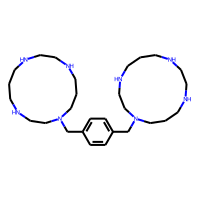
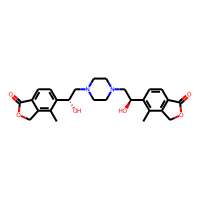
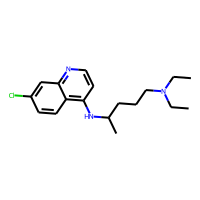
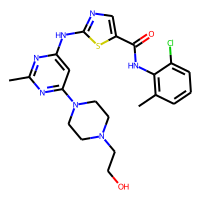
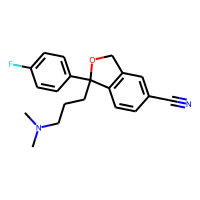
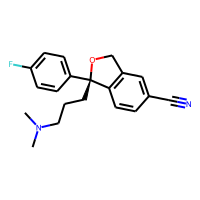
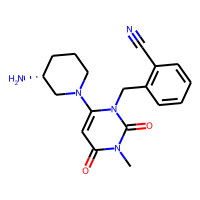
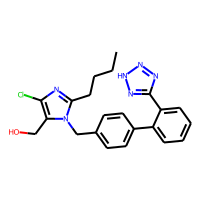
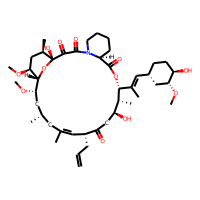
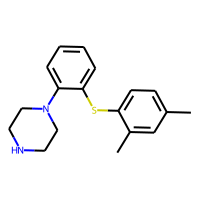

In [64]:
df_new2

In [73]:
df_final = df_new2.merge(df_desc, how='left', left_on='nct_id', right_on='nct_id')

In [75]:
df_final.columns

Index(['index', 'nct_id', 'smiless_first', 'molecule', 'PCA1', 'PCA2',
       'block_desc'],
      dtype='object')

In [78]:
df_final2 = df_final[['nct_id','smiless_first','block_desc','PCA1','PCA2']] 

In [150]:
df_final2.to_csv('df_molecule_pca.csv')

In [100]:
alt.Chart(df_final2[0:5000]).mark_point().encode(
           x = 'PCA1',
           y = 'PCA2',
           color = 'block_desc',
           tooltip = ['nct_id', 'smiless_first']).interactive()

alt.Chart(...)

In [99]:
with zipfile.ZipFile("full_df.zip") as myzip:    
    no1 = myzip.open("full_df.csv")
    

#Now, we can read in the data
df = pd.read_csv(eval('no1'), index_col=0 )

In [84]:
import os
import zipfile
import pandas as pd
import numpy as np
import altair as alt
import streamlit as st
from vega_datasets import data
import icd10

In [86]:
df

,Unnamed: 0,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
1,1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
2,2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
3,3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
4,4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [88]:
participants = pd.read_csv('outcome_counts.txt', sep='|')




In [89]:
# add number of participants
part_per_trial = participants.groupby(["nct_id"])["count"].sum().to_frame()
part_per_trial = part_per_trial.astype(int)
part_per_trial = part_per_trial.reset_index()
part_per_trial = part_per_trial.rename({"nct_id": "nctid", "count": "n_participants"}, axis="columns")


In [90]:
part_per_trial

,nctid,n_participants
0,NCT00000125,1636
1,NCT00000134,274
2,NCT00000135,209
3,NCT00000136,234
4,NCT00000142,64
...,...,...
53051,NCT05057923,18
53052,NCT05087524,130
53053,NCT05143541,400
53054,NCT05167370,2


In [91]:
part_per_trial.isna().sum()

nctid             0
n_participants    0
dtype: int64

In [101]:
df = df.merge(part_per_trial, left_on="nct_id", right_on = "nctid" ,how="left")

In [102]:
df

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc,nctid,n_participants
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...,NCT01364649,1186.0
1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...,NCT01364649,1186.0
1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,217.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...,NCT01364649,1186.0
1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,207.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...,NCT01364649,1186.0


In [103]:
df.columns

Index(['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs', 'smiless',
       'study_date', 'country', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc',
       'nctid', 'n_participants'],
      dtype='object')

In [104]:
columns_order = ['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs', 'smiless',
       'study_date', 'country', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc',
       'nctid', 'n_participants']


In [105]:

df2 = df[['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs', 'smiless',
       'study_date', 'country', 'n_participants', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc']]

# Change n_participants to participant_count


In [108]:
df2.head()

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,n_participants,outcome,icdcodes_first,description,chapter,block,block_desc
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,NaN,NaN,NaN


# Re imputation for chapter and participant count 

In [107]:
def get_chapter(x): 
  code = icd10.find(x)
  desc = 'Other'

  try: 
    desc =  code.chapter
  except Exception: 
    pass 
  return desc

In [112]:
df2['chapter'] = df2['icdcodes_first'].apply(get_chapter)

<ipython-input-112-da6c3b978d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['chapter'] = df2['icdcodes_first'].apply(get_chapter)


In [113]:
df2

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,n_participants,outcome,icdcodes_first,description,chapter,block,block_desc
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,None,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,None,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,None,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,None,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [115]:
# Mapped as Other
df2[df2['chapter'] == 'Other']['icdcodes_first'].value_counts()

B00.81     6189
F32.A      4952
M45.A2     2930
M45.A1     2681
M31.11     1476
J82.83     1074
E74.810     364
H18.523     319
K74.02      290
M54.50      258
Z71.85      142
R63.31      137
O9A.52      121
R05.1        94
J00          74
F11.13       73
K74.01       72
G00.3        53
G11.11       38
C7A.1        35
R05.3        32
C7A.00       28
G40.833      25
G92.00       12
U07.1        11
C4A.52       10
O00.00        5
Q87.11        4
B00.0         3
Name: icdcodes_first, dtype: int64

In [123]:
df2[df2['chapter'].isna()]['icdcodes_first'].value_counts()

Series([], Name: icdcodes_first, dtype: int64)

In [121]:
# hand curation
df2.loc[df2['icdcodes_first'] == 'B00.0', 'chapter'] = 'I'
df2.loc[df2['icdcodes_first'] == 'B00.81', 'chapter'] = 'I'
df2.loc[df2['icdcodes_first'] == 'F32.A', 'chapter'] = 'V'
df2.loc[df2['icdcodes_first'] == 'M45.A2', 'chapter'] = 'XIII'
df2.loc[df2['icdcodes_first'] == 'M45.A1', 'chapter'] = 'XIII'
df2.loc[df2['icdcodes_first'] == 'M31.11', 'chapter'] = 'XIII'
df2.loc[df2['icdcodes_first'] == 'J82.83', 'chapter'] = 'X'

df2.loc[df2['chapter'].isna(), 'chapter'] = 'II'
df2.loc[df2['icdcodes_first'] == 'C7A', 'chapter'] = 'II'
df2.loc[df2['icdcodes_first'] == 'J00', 'chapter'] = 'X'
df2.loc[df2['icdcodes_first'] == 'K94', 'chapter'] = 'XI'
df2.loc[df2['icdcodes_first'] == 'O00', 'chapter'] = 'XV'
df2.loc[df2['icdcodes_first'] == 'O9A', 'chapter'] = 'XV'

In [124]:
df2

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,n_participants,outcome,icdcodes_first,description,chapter,block,block_desc
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,NaN,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,NaN,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,NaN,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,NaN,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,NaN,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [125]:
# Impute the number of participants per chapter with the median due to skewedness
df2['n_participants'] = df2['n_participants'].fillna(df2.groupby('chapter')['n_participants'].transform('median'))





<ipython-input-125-79792f606be7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['n_participants'] = df2['n_participants'].fillna(df2.groupby('chapter')['n_participants'].transform('median'))


In [126]:
df2

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,n_participants,outcome,icdcodes_first,description,chapter,block,block_desc
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [134]:
df2.isna().sum()

nct_id                    0
status                    0
phase                     0
diseases                  0
icdcodes                  0
drugs                     0
smiless                   0
study_date              737
country                4042
participant_count         0
outcome                   0
icdcodes_first            0
description               0
chapter                   0
block                137300
block_desc           137300
dtype: int64

In [133]:
# Change n_participants to participant_count

df2 = df2.rename(columns={"n_participants": "participant_count"})


In [135]:
df2.to_csv('df_country.csv')

In [136]:
df2.columns

Index(['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs', 'smiless',
       'study_date', 'country', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc'],
      dtype='object')

In [137]:
df3 = df2[['nct_id', 'status', 'phase', 'diseases', 'icdcodes', 'drugs', 'smiless',
       'study_date', 'participant_count', 'outcome',
       'icdcodes_first', 'description', 'chapter', 'block', 'block_desc']]

In [139]:
df3 = df3.drop_duplicates('nct_id', keep='first')

In [141]:
df3= df3.reset_index()

In [142]:
df3

,index,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,13,NCT01558674,terminated,phase 1,"['renal impairment', 'heart failure']","['M10.38', 'M10.30', 'M10.311', 'M10.312', 'M1...","['mk-7145', 'furosemide', 'torsemide']",['CC1=C2COC(=O)C2=CC=C1[C@@H](O)CN1CCN(C[C@H](...,2012-03-16,97.0,0,M10.38,"Gout due to renal impairment, vertebrae",XIII,M00-M99,Diseases of the musculoskeletal system and con...
2,91,NCT01575782,terminated,phase 1,['small cell lung cancer'],"['C78.00', 'C78.01', 'C78.02', 'D14.30', 'D14....",['chloroquine'],['CCN(CC)CCCC(C)NC1=C2C=CC(Cl)=CC2=NC=C1'],2012-04-03,4656.0,0,C78.00,Secondary malignant neoplasm of unspecified lung,II,NaN,NaN
3,92,NCT01609816,terminated,phase 1,"['non-hodgkins lymphoma', 'multiple', 'mycosis...","['S33.110S', 'S33.111S', 'S33.120S', 'S33.121S...",['dasatinib'],['CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(C)C=CC=C2Cl)=C...,2012-05-30,2361.0,0,S33.110S,"Subluxation of L1/L2 lumbar vertebra, sequela",XIX,S00-T98,"Injury, poisoning and certain other consequenc..."
4,93,NCT01657760,completed,phase 1,['alcohol dependence'],"['F10.20', 'F10.24', 'F10.27', 'F10.280', 'F10...",['citalopram'],['CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1'],2012-07-23,80.0,1,F10.20,"Alcohol dependence, uncomplicated",V,F00-F99,Mental and behavioural disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11596,1352146,NCT01015118,completed,phase 3,"['ovarian neoplasms', 'peritoneal neoplasms']","['C05.2', 'C10.0', 'C16.0', 'C16.4', 'C17.0', ...","['placebo', 'paclitaxel', 'bibf 1120', 'carbop...",['CN1C(=O)C=C(N2CCC[C@@H](N)C2)N(CC2=C(C=CC=C2...,2009-11-09,12294.0,1,C05.2,Malignant neoplasm of uvula,II,C00-D48,Neoplasms
11597,1352578,NCT01127217,completed,phase 3,['hypertension'],"['I15.0', 'I97.3', 'K76.6', 'P29.2', 'G93.2', ...","['amlodipine/losartan', 'amlodipine']",['CCCCC1=NC(Cl)=C(CO)N1CC1=CC=C(C=C1)C1=CC=CC=...,2010-05-19,13040.0,1,I15.0,Renovascular hypertension,IX,I00-I99,Diseases of the circulatory system
11598,1352579,NCT01187953,completed,phase 3,['renal failure'],"['P96.0', 'O03.32', 'O04.82', 'O08.4', 'O03.82...","['prograf (tacrolimus)', 'lcp-tacro']",['CO[C@@H]1C[C@@H](CC[C@H]1O)\\C=C(/C)[C@H]1OC...,2010-08-23,1086.0,1,P96.0,Congenital renal failure,XVI,P00-P96,Certain conditions originating in the perinata...
11599,1352639,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [145]:
df3.to_csv('df_without_country.csv')

In [176]:
df2

,index,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
2,2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
3,3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
4,4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46451,1352631,NCT01187953,completed,phase 3,['renal failure'],"['P96.0', 'O03.32', 'O04.82', 'O08.4', 'O03.82...","['prograf (tacrolimus)', 'lcp-tacro']",['CO[C@@H]1C[C@@H](CC[C@H]1O)\\C=C(/C)[C@H]1OC...,2010-08-23,Spain,1086.0,1,P96.0,Congenital renal failure,XVI,P00-P96,Certain conditions originating in the perinata...
46452,1352635,NCT01187953,completed,phase 3,['renal failure'],"['P96.0', 'O03.32', 'O04.82', 'O08.4', 'O03.82...","['prograf (tacrolimus)', 'lcp-tacro']",['CO[C@@H]1C[C@@H](CC[C@H]1O)\\C=C(/C)[C@H]1OC...,2010-08-23,Sweden,1086.0,1,P96.0,Congenital renal failure,XVI,P00-P96,Certain conditions originating in the perinata...
46453,1352639,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,United States,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
46454,1352645,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [167]:
import numpy as np
import pandas as pd
import altair as alt

# Generate some random data
rng = np.random.RandomState(1)
x = rng.rand(40) ** 2
y = 10 - 1.0 / (x + 0.1) + rng.randn(40)
source = pd.DataFrame({"x": x, "y": y})

# Define the degree of the polynomial fits
degree_list = [1, 3, 5]

base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y"),tooltip=['x','y']
)
base.encoding.x.title = 'Historical Success Rate'
base.encoding.y.title = 'Number of Patients'
polynomial_fit = [
    base.transform_regression(
        "x", "y", method="poly", order=order, as_=["x", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "y"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)


alt.LayerChart(...)

In [161]:
base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y"),tooltip=['x','y']
).interactive()
base

alt.Chart(...)

In [169]:
with zipfile.ZipFile("df_country.zip") as myzip:    
    no1 = myzip.open("df_country.csv")

#Now, we can read in the data
df = pd.read_csv(eval('no1'), index_col=0)

In [170]:
df

,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352647,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352648,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352649,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
1352650,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [171]:
df2 = df.drop_duplicates(['nct_id', 'country'], keep='first')

In [173]:
df2 = df2.reset_index()

In [174]:
df2.to_csv("df_country.csv")

In [175]:
df2

,index,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
1,1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
2,2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
3,3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
4,4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46451,1352631,NCT01187953,completed,phase 3,['renal failure'],"['P96.0', 'O03.32', 'O04.82', 'O08.4', 'O03.82...","['prograf (tacrolimus)', 'lcp-tacro']",['CO[C@@H]1C[C@@H](CC[C@H]1O)\\C=C(/C)[C@H]1OC...,2010-08-23,Spain,1086.0,1,P96.0,Congenital renal failure,XVI,P00-P96,Certain conditions originating in the perinata...
46452,1352635,NCT01187953,completed,phase 3,['renal failure'],"['P96.0', 'O03.32', 'O04.82', 'O08.4', 'O03.82...","['prograf (tacrolimus)', 'lcp-tacro']",['CO[C@@H]1C[C@@H](CC[C@H]1O)\\C=C(/C)[C@H]1OC...,2010-08-23,Sweden,1086.0,1,P96.0,Congenital renal failure,XVI,P00-P96,Certain conditions originating in the perinata...
46453,1352639,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,United States,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...
46454,1352645,NCT01364649,completed,phase 3,['treatment outcome'],"['Z01.12', 'Z92.89', 'Z75.2', 'M27.59', 'Z53.9...","['vortioxetine', 'escitalopram', 'placebo']","['CC1=CC=C(SC2=CC=CC=C2N2CCNCC2)C(C)=C1', 'CN(...",2011-05-31,Canada,1186.0,1,Z01.12,Encounter for hearing conservation and treatment,XXI,Z00-Z99,Factors influencing health status and contact ...


In [179]:
# compute the success probability per ICD chapter
trial_success = df3.groupby(['chapter']).agg(total_trials=('nct_id', np.size),
                                            successful_trial=('outcome', np.sum))
trial_success['probability_success'] = trial_success['successful_trial'] / trial_success['total_trials']
trial_success = trial_success['probability_success']

In [180]:
df2 = df2.merge(trial_success, on='chapter', how='left')
df2.head()

,index,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,country,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc,probability_success
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Belgium,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361
1,1,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Czechia,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361
2,2,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Denmark,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361
3,3,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,France,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361
4,4,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,Germany,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361


In [181]:
df3= df3.merge(trial_success, on='chapter', how='left')
df3.head()

,index,nct_id,status,phase,diseases,icdcodes,drugs,smiless,study_date,participant_count,outcome,icdcodes_first,description,chapter,block,block_desc,probability_success
0,0,NCT01288573,completed,phase 1/phase 2,"['ewings sarcoma/soft tissue sarcoma', 'neurob...","['C71.7', 'C71.9', 'C79.31', 'D33.0', 'D33.1',...","['plerixafor', 'plerixafor', 'plerixafor']",['C(N1CCCNCCNCCCNCC1)C1=CC=C(CN2CCCNCCNCCCNCC2...,2011-01-28,4656.0,1,C71.7,Malignant neoplasm of brain stem,II,NaN,NaN,0.410361
1,13,NCT01558674,terminated,phase 1,"['renal impairment', 'heart failure']","['M10.38', 'M10.30', 'M10.311', 'M10.312', 'M1...","['mk-7145', 'furosemide', 'torsemide']",['CC1=C2COC(=O)C2=CC=C1[C@@H](O)CN1CCN(C[C@H](...,2012-03-16,97.0,0,M10.38,"Gout due to renal impairment, vertebrae",XIII,M00-M99,Diseases of the musculoskeletal system and con...,0.683367
2,91,NCT01575782,terminated,phase 1,['small cell lung cancer'],"['C78.00', 'C78.01', 'C78.02', 'D14.30', 'D14....",['chloroquine'],['CCN(CC)CCCC(C)NC1=C2C=CC(Cl)=CC2=NC=C1'],2012-04-03,4656.0,0,C78.00,Secondary malignant neoplasm of unspecified lung,II,NaN,NaN,0.410361
3,92,NCT01609816,terminated,phase 1,"['non-hodgkins lymphoma', 'multiple', 'mycosis...","['S33.110S', 'S33.111S', 'S33.120S', 'S33.121S...",['dasatinib'],['CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(C)C=CC=C2Cl)=C...,2012-05-30,2361.0,0,S33.110S,"Subluxation of L1/L2 lumbar vertebra, sequela",XIX,S00-T98,"Injury, poisoning and certain other consequenc...",0.444134
4,93,NCT01657760,completed,phase 1,['alcohol dependence'],"['F10.20', 'F10.24', 'F10.27', 'F10.280', 'F10...",['citalopram'],['CN(C)CCCC1(OCC2=C1C=CC(=C2)C#N)C1=CC=C(F)C=C1'],2012-07-23,80.0,1,F10.20,"Alcohol dependence, uncomplicated",V,F00-F99,Mental and behavioural disorders,0.642759


In [182]:
df2.to_csv("df_country.csv")
df3.to_csv("df_without_country.csv")